In [39]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
import itertools as iter

In [40]:
products = pd.read_csv('Dataset/products.csv')
aisles = pd.read_csv('Dataset/aisles.csv')
departments = pd.read_csv('Dataset/departments.csv')
order_products_train = pd.read_csv('Dataset/order_products__train.csv')
order_products_prior = pd.read_csv('Dataset/order_products__prior.csv')
orders = pd.read_csv('Dataset/orders.csv')

In [41]:
items  = pd.merge(left =pd.merge(left=products, right=departments, how='left', on = 'department_id'), right=aisles, how='left', on = 'aisle_id')
Train_data = orders.merge(order_products_prior,how='inner', left_on='order_id', right_on='order_id').drop(columns=['eval_set'])

In [42]:
Train_data = Train_data.merge(items,how='inner', left_on='product_id', right_on='product_id')

In [43]:
Train_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,beverages,soft drinks
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,beverages,soft drinks
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,beverages,soft drinks
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,beverages,soft drinks


In [44]:
order_products_all = pd.concat([order_products_train, order_products_prior], axis=0)

**MISSING DATA**

In [45]:
total = Train_data.isnull().sum().sort_values(ascending=False)
total
percent = (Train_data.isnull().sum()/Train_data.isnull().count()).sort_values(ascending=False)
percent
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
days_since_prior_order,2078068,0.06407
order_id,0,0.00000
user_id,0,0.00000
order_number,0,0.00000
order_dow,0,0.00000
order_hour_of_day,0,0.00000
product_id,0,0.00000
add_to_cart_order,0,0.00000
reordered,0,0.00000
product_name,0,0.00000


**MOST ORDERED PRODUCTS**

In [46]:
prod_f = order_products_all.groupby("product_id")["reordered"].size().reset_index(name='Total_reorders')
prod_f = pd.merge(prod_f, products[['product_id', 'product_name']], how='left', on=['product_id'])
prod_f = prod_f.sort_values(by='Total_reorders', ascending=False)[:10]
prod_f

,product_id,Total_reorders,product_name
24849,24852,491291,Banana
13173,13176,394930,Bag of Organic Bananas
21134,21137,275577,Organic Strawberries
21900,21903,251705,Organic Baby Spinach
47205,47209,220877,Organic Hass Avocado
47762,47766,184224,Organic Avocado
47622,47626,160792,Large Lemon
16794,16797,149445,Strawberries
26206,26209,146660,Limes
27842,27845,142813,Organic Whole Milk


product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: Total_reorders, dtype: int64


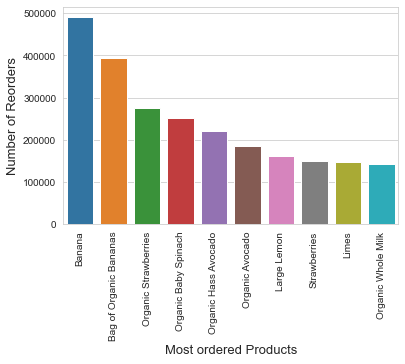

In [47]:
prod_f  = prod_f.groupby(['product_name'])['Total_reorders'].sum().sort_values(ascending=False)
print(prod_f)
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')
sns.barplot(x=prod_f.index,y=prod_f.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

**Most reordered products**

In [48]:
prod_f = order_products_all.groupby("product_id")["reordered"].agg({'sum','count'}).reset_index()
prod_f.rename(columns = {'sum':'reorder_sum'}, inplace = True)
prod_f.rename(columns = {'count':'reorder_total'}, inplace = True)
# prod_f = order_products_all.groupby("product_id")["reordered"].agg({}).reset_index()['reorder_total']
prod_f['reorder_probability'] = prod_f['reorder_sum'] / prod_f['reorder_total']
prod_f = pd.merge(prod_f, products[['product_id', 'product_name']], how='left', on=['product_id'])
prod_f = prod_f[prod_f.reorder_total > 75].sort_values(['reorder_probability'], ascending=False)[:10]
prod_f

,product_id,reorder_total,reorder_sum,reorder_probability,product_name
2074,2075,90,84,0.933333,Serenity Ultimate Extrema Overnight Pads
27737,27740,102,94,0.921569,Chocolate Love Bar
35601,35604,104,93,0.894231,Maca Buttercups
38248,38251,111,99,0.891892,Benchbreak Chardonnay
36798,36801,99,88,0.888889,Organic Blueberry B Mega
10233,10236,131,114,0.870229,Fragrance Free Clay with Natural Odor Eliminat...
20595,20598,114,99,0.868421,Thousand Island Salad Snax
5455,5457,90,78,0.866667,Classic Carbonated Natural Mineral Water
35493,35496,457,394,0.862144,Real2 Alkalized Water 500 ml
9289,9292,2995,2580,0.861436,Half And Half Ultra Pasteurized


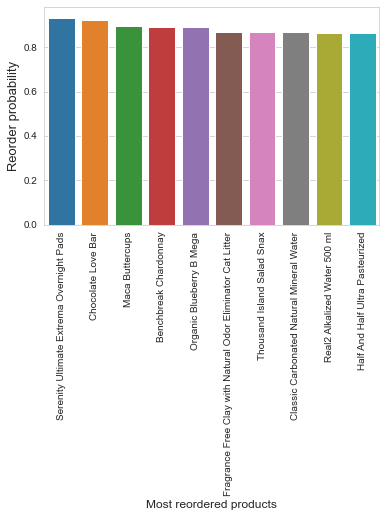

In [49]:
prod_f  = prod_f.groupby(['product_name'])['reorder_probability'].sum().sort_values(ascending=False)
prod_f
sns.set_style('whitegrid')
#f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=prod_f.index, y=prod_f.values)
#plt.ylim([0.85,0.95])
plt.ylabel('Reorder probability', fontsize=13)
plt.xlabel('Most reordered products', fontsize=12)
plt.show()


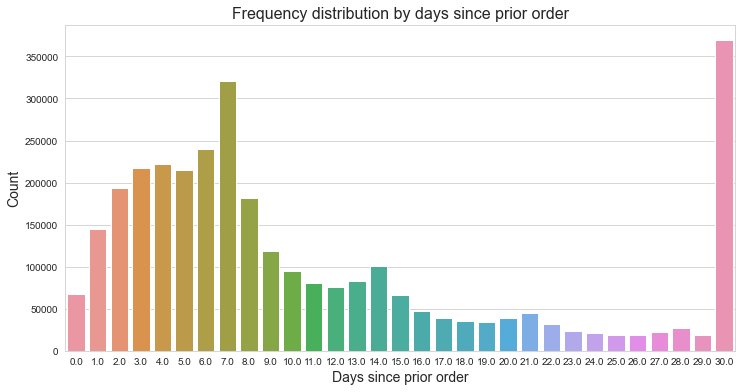

In [50]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.title("Frequency distribution by days since prior order", fontsize=16)
plt.show()

##### From this plot we can see that 7th day is where we have a spike, and then a relative small peak at days 14,21 and 28 which indicates that every 7 days or weekly is the order frequency. And then again there's a huge peak at the end of the month indicating that there's a monthly peak.

In [51]:
deptIsle= items.groupby(['department_id','department','aisle']).size().reset_index(name='Total_products')
deptIsle.nlargest(10, 'Total_products')


,department_id,department,aisle,Total_products
133,21,missing,missing,1258
117,19,snacks,candy chocolate,1246
10,1,frozen,ice cream ice,1091
64,11,personal care,vitamins supplements,1038
102,16,dairy eggs,yogurt,1026
118,19,snacks,chips pretzels,989
37,7,beverages,tea,894
98,16,dairy eggs,packaged cheese,891
5,1,frozen,frozen meals,880
119,19,snacks,cookies cakes,874


**PRODUCTS BY DEPARTMENT**

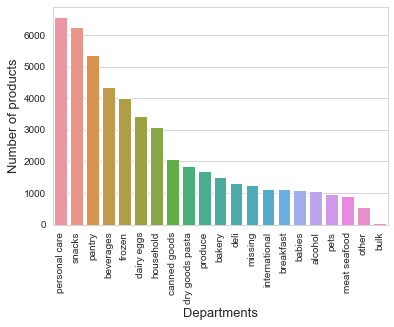

In [53]:

deptIsle= items.groupby(['department']).size().reset_index(name='Total_products')
deptData  = deptIsle.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style('whitegrid')
#f, ax = plt.subplots(figsize=(8, 8))
plt.xticks(rotation='vertical')
sns.barplot(x=deptData.index, y=deptData.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

**PRODUCTS BY AISLE**

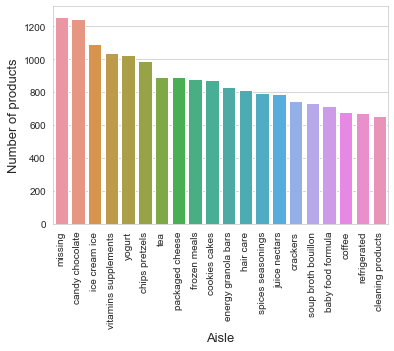

In [55]:

deptIsle= items.groupby(['aisle']).size().reset_index(name='Total_products')
aisleData  = deptIsle.groupby(['aisle']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style('whitegrid')
plt.xticks(rotation='vertical')
sns.barplot(x=aisleData.index[0:20], y=aisleData.values[0:20])
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Aisle', fontsize=13)
plt.show()

**ORDERS BY DEPARTMENT**

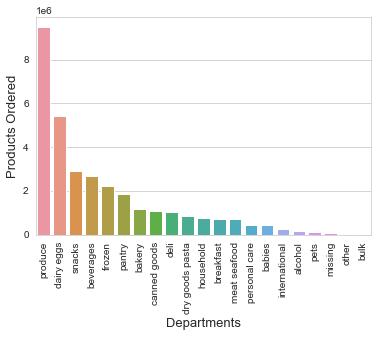

In [56]:

deptIsle= Train_data.groupby(['department']).size().reset_index(name='Total_products')
deptData  = deptIsle.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')
sns.barplot(x=deptData.index, y=deptData.values)
plt.ylabel('Products Ordered', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()


**ORDERS BY AISLE**

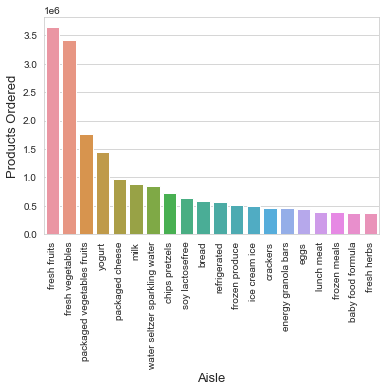

In [57]:

deptIsle= Train_data.groupby(['aisle']).size().reset_index(name='Total_products')
aisleData  = deptIsle.groupby(['aisle']).sum()['Total_products'].sort_values(ascending=False)
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')
sns.barplot(x=aisleData.index[0:20], y=aisleData.values[0:20])
plt.ylabel('Products Ordered', fontsize=13)
plt.xlabel('Aisle', fontsize=13)
plt.show()

In [58]:
#here i check the order in wich the product was ordered
addToCartNumber= Train_data.groupby(['add_to_cart_order','product_name']).size().reset_index(name='Total_products')
addToCartNumber['ProdTimesAddto'] = addToCartNumber.add_to_cart_order*addToCartNumber.Total_products
addToCartNumber=addToCartNumber.groupby(['product_name']).median()['add_to_cart_order'].sort_values(ascending=True).reset_index()

addToCartNumber.head(10)

,product_name,add_to_cart_order
0,Pappardelle Nests Pasta,1.0
1,"Flax Oil, Organic, Omega-3, Original Formula",1.0
2,Rosa Mosqueta Rose Hip Seed Oil,1.0
3,Prenatal Nutrients,1.0
4,Indian Wells Merlot,1.0
5,Lndbrg White Quinoa 16 Z,1.0
6,"Indoor & Outdoor Allergies, Allergy & Congesti...",1.0
7,Chocolate Peppermint Tart,1.0
8,Easter Basket,1.0
9,Vanilla Flavor Multi-Symptom Relief,1.0


In [59]:
Reorder_rate=Train_data[['user_id','product_name', 'reordered',]].groupby(['user_id','product_name']).agg('sum')
Reorder_rate.sort_values(['user_id', 'reordered'], ascending=[True, False])

reordered
user_id product_name                                                 
1       Original Beef Jerky                                         9
        Soda                                                        9
        Pistachios                                                  8
        Organic String Cheese                                       7
        Cinnamon Toast Crunch                                       2
...                                                               ...
206209  Total 0% Nonfat Plain Greek Yogurt                          0
        Ultra Downy Free & Gentle Liquid Fabric Conditi...          0
        Unsalted Tops Saltine Crackers                              0
        Yellow Bell Pepper                                          0
        Yellow Onion                                                0

[13307953 rows x 1 columns]

**Frequency of Reorders in a Week**

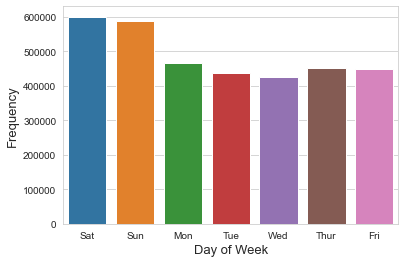

In [61]:
reorder_dow_freq = orders['order_dow'].value_counts().sort_index()
reorder_dow_freq.index=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']

sns.set_style('whitegrid')
sns.barplot(x=reorder_dow_freq.index, y=reorder_dow_freq.values)
plt.xlabel('Day of Week', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()

**Frequency of Reorders in Hour of Day**

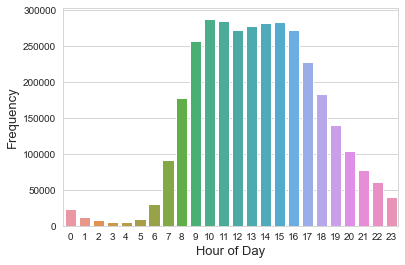

In [62]:
reorder_hour_of_day_freq = orders['order_hour_of_day'].value_counts().sort_index()
#reorder_hour_of_day_freq.index = [str(i) for i in range(24)]

sns.set_style('whitegrid')
sns.barplot(x=reorder_hour_of_day_freq.index, y=reorder_hour_of_day_freq.values)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.show()


**Nmber of Products per Order**

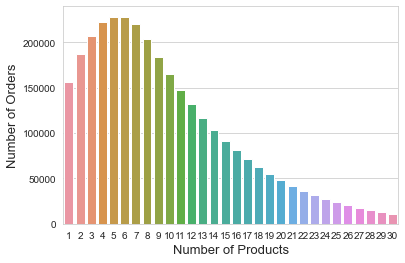

In [63]:
order_nproduct = Train_data.groupby('order_id')['product_id'].agg('count').reset_index()
order_nproduct =  order_nproduct.groupby('product_id')['order_id'].agg('count').nlargest(30)

sns.set_style('whitegrid')
sns.barplot(x=order_nproduct.index, y=order_nproduct.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of Products', fontsize=13)
plt.show()


<AxesSubplot:>

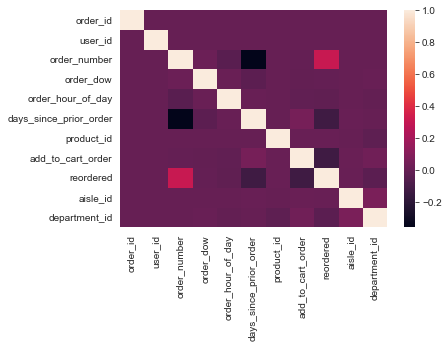

In [64]:
corr = Train_data.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)